## [Experiments] Implementation of GP-Select

Implement the optimisation criterion from the Paper "Selecting valuable items from massive data" with a custom kernel function.

In [1]:
%matplotlib inline
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic,
                                              ExpSineSquared, DotProduct,
                                              ConstantKernel)
import math
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import sklearn.datasets as data
houses = data.load_boston()

In [16]:
X.shape

(506, 13)

In [11]:
y = houses['target']
X = houses['data']

In [12]:
kernel = 1.0 * RBF(length_scale=1.0,length_scale_bounds=(1e-1,10.0))
gp = GaussianProcessRegressor(kernel=kernel)

How does the std change when we use more data for prediction?

In [32]:
def fit_and_predict(using_examples):
    gp.fit(X[:using_examples], y[:using_examples])
    y_mean, y_std = gp.predict(X,return_std=True)
    return y_std

## Random ordering

In [42]:
test_samples = range(1,506)
std = [fit_and_predict(i) for i in test_samples]
max_std = [item.max() for item in std]
mean_std = [item.mean() for item in std]
var_std = [item.var() for item in std]

C:\Users\Freya\Anaconda3\envs\Basic\lib\site-packages\sklearn\gaussian_process\gpr.py:308: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


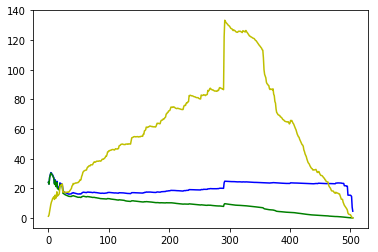

In [45]:
std_y = range(len(test_samples))
plt.plot(std_y,max_std,color='b',)
plt.plot(std_y,mean_std,color='g')
plt.plot(std_y,var_std,color='y')

## Uncertainty Sampling, Greedy 

In [47]:
def fit_and_predict_indexed(idx):
    gp.fit(X[idx], y[idx])
    y_mean, y_std = gp.predict(X,return_std=True)
    return y_std

In [48]:
current_idx = []
std_unSamp = []

# init model with random data point
start = np.random.choice(np.arange(506))
current_idx.append(start)
current_y_std = fit_and_predict_indexed(idx)
std_unSamp.append(current_y_std)

for index in range(2,100):
    max_std_idx = np.unravel_index(np.argmax(current_y_std, axis=None), y_std.shape)
    current_idx.append(max_std_idx)
    current_y_std = fit_and_predict_indexed(idx)
    std_unSamp.append(current_y_std)

In [49]:
max_std_unSamp = [item.max() for item in std_unSamp]
mean_std_unSamp = [item.mean() for item in std_unSamp]
var_std_unSamp = [item.var() for item in std_unSamp]

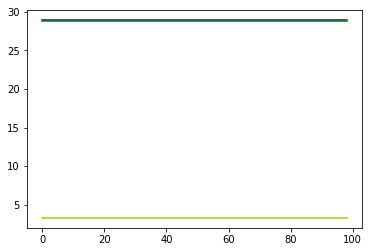

In [51]:
std_y = range(len(std_unSamp)) 
plt.plot(std_y,max_std_unSamp,color='b')
plt.plot(std_y,mean_std_unSamp,color='g')
plt.plot(std_y,var_std_unSamp,color='y')
#=> Why do all the std's aquire the same value?
#=> If we compare this to the lower dimensional case we might be having the case of the curse of dim
#=> We have 15 dimensions and fit at most ~100 items
#=> How would this change if we changed the number of features?

In [56]:
def fit_and_predict_indexed_3features(idx):
    gp.fit(X[idx,:3], y[idx])
    y_mean, y_std = gp.predict(X[:,:3],return_std=True)
    return y_std

In [57]:
current_idx = []
std_unSampSmall = []

# init model with random data point
start = np.random.choice(np.arange(506))
current_idx.append(start)
current_y_std = fit_and_predict_indexed(idx)
std_unSampSmall.append(current_y_std)

for index in range(2,100):
    max_std_idx = np.unravel_index(np.argmax(current_y_std, axis=None), y_std.shape)
    current_idx.append(max_std_idx)
    current_y_std = fit_and_predict_indexed(idx)
    std_unSampSmall.append(current_y_std)

In [58]:
max_std_unSampSmall = [item.max() for item in std_unSampSmall]
mean_std_unSampSmall = [item.mean() for item in std_unSampSmall]
var_std_unSampSmall = [item.var() for item in std_unSampSmall]

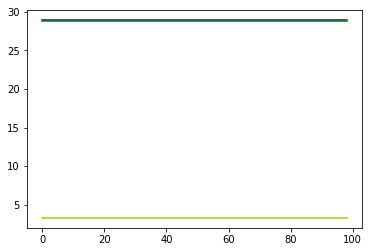

In [59]:
std_y = range(len(std_unSampSmall)) 
plt.plot(std_y,max_std_unSampSmall,color='b')
plt.plot(std_y,mean_std_unSampSmall,color='g')
plt.plot(std_y,var_std_unSampSmall,color='y')
#=> fewer features do not help!
#=> The argmax funtion takes always the first highest element
#=> so we are deterministically approximating our function space from the right side
#=> This is not a good idea

When does a point in a function contain more information than its neighbour?

maybe, if it was against several of our last hypothesises? Average the model over time

Use the variational prediction at a point

The question should specify information about **what**

Maybe this is something about how muh local structure corresponds to global structure

In active learning we would like to label the points that correspond best to the global structure, because this structure would give us the best *global* estimate

Is this just a reformulation of the diversity term?

In [44]:
No

NameError: name 'No' is not defined

The diversity term says we want to query terms that are very different from each other, but finding global structure implies that we do not 